In [1]:
#### detect hardware
from google.colab import drive
drive.mount('/content/drive/')


#### check for gpu
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    print(local_device_protos)

get_available_gpus()
##################################

Mounted at /content/drive/
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13976660312983611876
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 569120110263720098
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 14215383805299284619
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14640891840
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11858045546462146726
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [63]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

In [64]:
root = '/content/drive/My Drive/DNAChallenge/'
trainFeatures = root + 'train_values.csv'
trainLabels = root + 'train_labels.csv'
testFeatures =  root + 'test_values.csv'
submission = root + 'submission.csv'

In [65]:
x_train = pd.read_csv(trainFeatures)
y_train = pd.read_csv(trainLabels)

x_test = pd.read_csv(testFeatures)

In [66]:
x_train = x_train.set_index('sequence_id').join(y_train.set_index('sequence_id'))

In [5]:
#x_train = x_train.sample(frac=0.15, replace=True, random_state=1)

In [67]:
print(x_train.shape)

(63017, 1354)


In [79]:
metadataCols = [x for x in x_train.columns if '_' in x]
print(metadataCols)

['bacterial_resistance_ampicillin', 'bacterial_resistance_chloramphenicol', 'bacterial_resistance_kanamycin', 'bacterial_resistance_other', 'bacterial_resistance_spectinomycin', 'copy_number_high_copy', 'copy_number_low_copy', 'copy_number_unknown', 'growth_strain_ccdb_survival', 'growth_strain_dh10b', 'growth_strain_dh5alpha', 'growth_strain_neb_stable', 'growth_strain_other', 'growth_strain_stbl3', 'growth_strain_top10', 'growth_strain_xl1_blue', 'growth_temp_30', 'growth_temp_37', 'growth_temp_other', 'selectable_markers_blasticidin', 'selectable_markers_his3', 'selectable_markers_hygromycin', 'selectable_markers_leu2', 'selectable_markers_neomycin', 'selectable_markers_other', 'selectable_markers_puromycin', 'selectable_markers_trp1', 'selectable_markers_ura3', 'selectable_markers_zeocin', 'species_budding_yeast', 'species_fly', 'species_human', 'species_mouse', 'species_mustard_weed', 'species_nematode', 'species_other', 'species_rat', 'species_synthetic', 'species_zebrafish']


In [80]:
metaData = x_train[metadataCols].values
print(metaData.shape)

(63017, 39)


In [70]:
print(metaData)

[[0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [71]:
chars = 'ATCGN'
#1234

lst = []

for c in chars:
  for d in chars:
    s = c+d
    lst += [s]

print(lst)

def fct(char):
  return chars.index(char)+1

MAXLEN = 1024

val = []

for id, row in x_train.iterrows():

  l = len(row['sequence'])

  if l % 2 == 1:
    l -= 1

  res = [fct(x) for x in list(row['sequence'])]
  res = res[0:MAXLEN]

  if len(res) < MAXLEN:
    res +=  [0]* (MAXLEN-len(res))

  val.append(np.array(res).astype(np.uint8))

['AA', 'AT', 'AC', 'AG', 'AN', 'TA', 'TT', 'TC', 'TG', 'TN', 'CA', 'CT', 'CC', 'CG', 'CN', 'GA', 'GT', 'GC', 'GG', 'GN', 'NA', 'NT', 'NC', 'NG', 'NN']


In [72]:
val = np.array(val).astype(np.uint8)
print(val.shape)

(63017, 1024)


In [73]:
target = [x for x in y_train.columns if 'sequence' not in x]
l = len(x_train)
print(val)
print(x_train[target].values)

[[3 1 2 ... 4 4 3]
 [4 3 2 ... 0 0 0]
 [5 5 3 ... 4 4 4]
 ...
 [3 3 4 ... 2 3 1]
 [3 2 1 ... 1 3 3]
 [2 4 4 ... 2 2 3]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [84]:
X_train, X_val, metadata_train, metadata_val, Y_train, Y_val =  train_test_split(val, metaData, x_train[target].values, test_size=0.4, random_state=44)

In [85]:
print(metaData.shape)

(63017, 39)


In [86]:
print(X_train.shape)
print(X_val.shape)
print(metadata_train.shape)
print(metadata_val.shape)
print(Y_train.shape)
print(Y_val.shape)

(37810, 1024)
(25207, 1024)
(37810, 39)
(25207, 39)
(37810, 1314)
(25207, 1314)


In [87]:
print(X_train[0])
print(Y_train[0])
print(X_val[0])
print(Y_val[0])

[2 3 4 ... 2 3 4]
[0. 0. 0. ... 0. 0. 0.]
[3 2 2 ... 4 1 1]
[0. 0. 0. ... 0. 0. 0.]


In [78]:
from tensorflow.keras.mixed_precision import experimental as mixed_precision
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_policy(policy) 

######################## try mixed policy T4
EMBSIZE = 128

In [97]:
inputsmeta = tf.keras.layers.Input(shape=(39,1))

m = tf.keras.layers.Dense(2048, activation='relu')(inputsmeta)
m = tf.keras.layers.Dense(256, activation='relu')(m)
m = tf.keras.layers.Dense(512, activation='relu')(m)
m = tf.keras.layers.Flatten()(m)
m = tf.keras.layers.Dense(256, activation='relu')(m)


In [105]:
inputs =  tf.keras.layers.Input(shape=(MAXLEN,1))


c = tf.keras.layers.Conv1D(128, 5, padding='same', activation='relu')(inputs)
c = tf.keras.layers.MaxPooling1D(3)(c)
c = tf.keras.layers.ReLU()(c)

d = tf.keras.layers.Conv1D(128, 7, padding='same', activation='relu')(inputs)
d = tf.keras.layers.MaxPooling1D(3)(d)
d = tf.keras.layers.ReLU()(d)

e = tf.keras.layers.Conv1DTranspose(128, 11, padding='same', activation='relu')(inputs)
e = tf.keras.layers.MaxPooling1D(3)(e)
e = tf.keras.layers.ReLU()(e)

x = tf.keras.layers.concatenate([c,d,e])
x = tf.keras.layers.Conv1D(32, 5, padding='same', activation='relu')(x)
x = tf.keras.layers.MaxPooling1D(3)(x)
x = tf.keras.layers.Conv1D(16, 5, padding='same', activation='relu')(x)
x = tf.keras.layers.MaxPooling1D(3)(x)
x = tf.keras.layers.Flatten()(x)
###Dense layers
x = tf.keras.layers.Dense(256)(x)
x = tf.keras.layers.concatenate([x, m])
x = tf.keras.layers.ReLU()(x)
### prediction layer
predictions = tf.keras.layers.Dense(1314, activation='softmax')(x)

model = tf.keras.Model(inputs=[inputs, inputsmeta], outputs=predictions)

In [106]:
metric = tf.keras.metrics.TopKCategoricalAccuracy(k=10)

In [107]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(1e-03), metrics=['categorical_accuracy', metric])

In [108]:
model.summary()

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 1024, 1)]    0                                            
__________________________________________________________________________________________________
conv1d_24 (Conv1D)              (None, 1024, 128)    768         input_10[0][0]                   
__________________________________________________________________________________________________
conv1d_25 (Conv1D)              (None, 1024, 128)    1024        input_10[0][0]                   
__________________________________________________________________________________________________
conv1d_transpose_6 (Conv1DTrans (None, 1024, 128)    1536        input_10[0][0]                   
_______________________________________________________________________________________

In [40]:
!pip install keras-lr-finder

In [102]:
from keras_lr_finder import LRFinder

lr_finder = LRFinder(model)

lr_finder.find((X_train, metadata_train), Y_train, start_lr=0.00001, end_lr=1, batch_size=512, epochs=5)
lr_finder.plot_loss(n_skip_beginning=20, n_skip_end=5)


AttributeError: ignored

In [109]:
history = model.fit((X_train, metadata_train), Y_train, epochs=50, batch_size=512, validation_data=((X_val, metadata_val), Y_val))

Epoch 1/50
74/74 [==============================] - 11s 144ms/step - loss: 4.3006 - categorical_accuracy: 0.3156 - top_k_categorical_accuracy: 0.5397 - val_loss: 3.2963 - val_categorical_accuracy: 0.3914 - val_top_k_categorical_accuracy: 0.6764
Epoch 2/50
74/74 [==============================] - 10s 141ms/step - loss: 2.8185 - categorical_accuracy: 0.4206 - top_k_categorical_accuracy: 0.7329 - val_loss: 2.8258 - val_categorical_accuracy: 0.4287 - val_top_k_categorical_accuracy: 0.7396
Epoch 3/50
74/74 [==============================] - 11s 143ms/step - loss: 2.3189 - categorical_accuracy: 0.4860 - top_k_categorical_accuracy: 0.7975 - val_loss: 2.5238 - val_categorical_accuracy: 0.4989 - val_top_k_categorical_accuracy: 0.7820
Epoch 4/50
74/74 [==============================] - 11s 145ms/step - loss: 1.8913 - categorical_accuracy: 0.5639 - top_k_categorical_accuracy: 0.8510 - val_loss: 2.3594 - val_categorical_accuracy: 0.5415 - val_top_k_categorical_accuracy: 0.8072
Epoch 5/50
74/74 [==

In [112]:
#### helper plot function
import matplotlib.pyplot as plt
def plot_acc_loss(history):
  plt.plot(history.history['categorical_accuracy'], label='acc')
  plt.plot(history.history['val_categorical_accuracy'], label='val_acc')
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(loc='upper left')
  plt.show()


  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_los')
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(loc='upper right')
  plt.show()
    
  plt.plot(history.history['top_k_categorical_accuracy'], label='top10')
  plt.plot(history.history['val_top_k_categorical_accuracy'], label='val_top10')
  plt.title('model top10')
  plt.ylabel('top10')
  plt.xlabel('epoch')
  plt.legend(loc='upper right')
  plt.show()

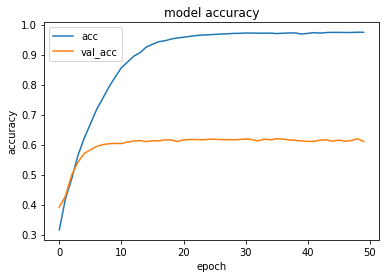

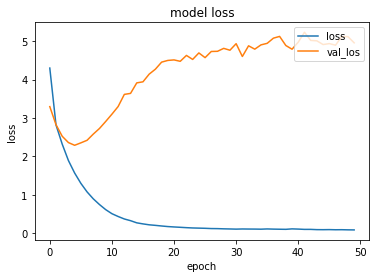

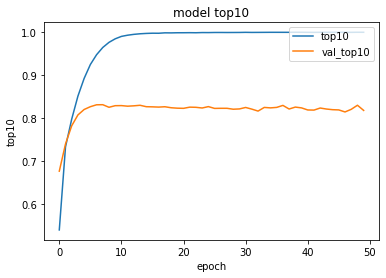

In [113]:
plot_acc_loss(history)

In [118]:
################################ find the length distribution of seqeunces that are not correctly identified
################################ all are > 1024
lenDist = []
predLabDist = []
expLabDist = []
predicted = []

for idx in range(0, X_val.shape[0], 32):

  pred = model.predict((X_val[idx:idx+32], metadata_val[idx:idx+32]), batch_size=32)
  expected = Y_val[idx:idx+32]

  for idx2 in range(len(pred)):
    predId = np.argmax(pred[idx2])+1
    expectedId = np.argmax(expected[idx2])+1
    if predId != expectedId:
      input = np.delete(X_val[idx2], np.where(X_val[idx2] == 0))
      lenDist.append(input.shape[0])
      predLabDist.append(predId)
      expLabDist.append(expectedId)
  predicted.append(np.argmax(pred[idx2])+1)

In [119]:
print(x_val.shape)
print(len(lenDist))
print(len(predLabDist))
print(len(expLabDist))

(25207, 1024)
9820
9820
9820


In [120]:
print(predicted)

[1164, 667, 1003, 797, 616, 522, 1009, 667, 48, 616, 667, 667, 600, 1009, 678, 381, 13, 330, 1075, 667, 494, 667, 762, 49, 375, 409, 667, 636, 1262, 952, 327, 1009, 1009, 809, 667, 1310, 1251, 5, 667, 969, 667, 1009, 667, 616, 847, 798, 667, 1009, 32, 889, 667, 58, 986, 336, 979, 667, 667, 667, 1268, 667, 457, 457, 667, 524, 1014, 1009, 9, 600, 9, 1257, 910, 474, 1249, 277, 300, 667, 411, 884, 667, 667, 983, 230, 128, 1164, 667, 667, 1129, 505, 667, 679, 404, 31, 1028, 642, 140, 1171, 1092, 616, 1009, 807, 395, 1175, 1043, 356, 50, 600, 288, 1177, 183, 809, 375, 1075, 525, 1171, 371, 1066, 667, 13, 120, 940, 959, 667, 299, 231, 667, 667, 100, 1066, 143, 505, 983, 943, 268, 667, 952, 667, 202, 616, 1066, 381, 999, 667, 395, 667, 763, 285, 587, 9, 69, 673, 667, 1050, 1239, 115, 1009, 708, 331, 667, 616, 1177, 13, 422, 974, 600, 1126, 616, 909, 441, 667, 156, 266, 395, 618, 348, 616, 468, 120, 667, 667, 1040, 573, 13, 5, 143, 413, 1262, 367, 616, 573, 954, 1055, 149, 550, 616, 1003, 381, 

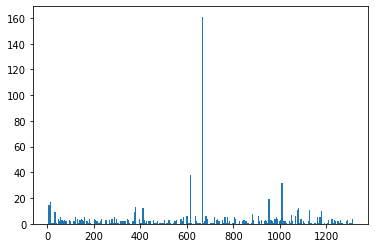

In [121]:
import matplotlib.pyplot as plt
_ = plt.hist(predicted, bins=256)
plt.show()

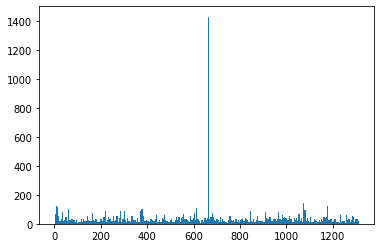

In [122]:
_ = plt.hist(expLabDist, bins=256)
plt.show()

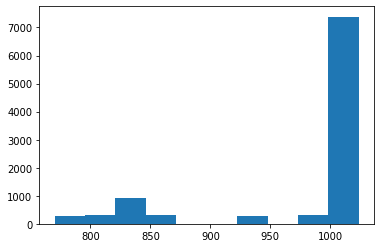

In [123]:
import matplotlib.pyplot as plt
_ = plt.hist(lenDist)
plt.show()

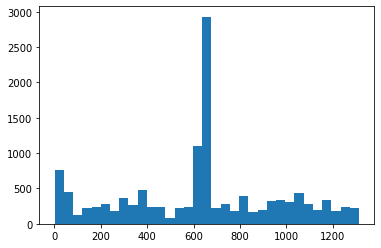

In [29]:
_ = plt.hist(predLabDist,  bins='auto')
plt.show()

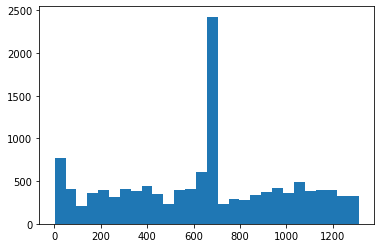

In [30]:
_ = plt.hist(expLabDist,  bins='auto')
plt.show()

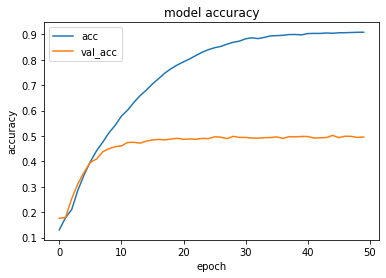

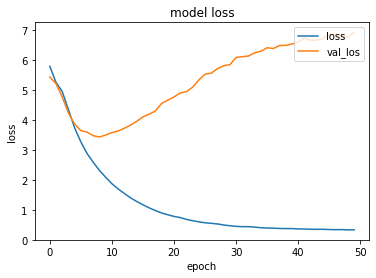

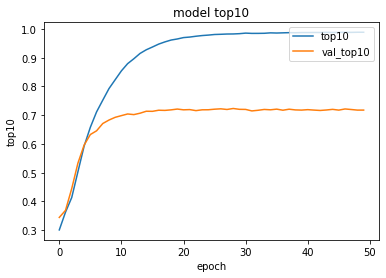

In [31]:
plot_acc_loss(history)